In [1]:
pip install pandas numpy scikit-learn factor-analyzer matplotlib seaborn

     ---------------------------------------- 0.0/42.8 kB ? eta -:--:--
     --------- ------------------------------ 10.2/42.8 kB ? eta -:--:--
     ------------------ ------------------- 20.5/42.8 kB 217.9 kB/s eta 0:00:01
     -------------------------------------- 42.8/42.8 kB 346.6 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42623 sha256=e7d1ce7d1c7a84e7eb3daa1d19edf536795fb496702a274388f3a1965ed2caf1
  Stored in directory: c:\users\prakash r\appdata\local\pip\cache\wheels\fa\f7\53\a55a8a56668a6fe0199e0e02b6e0ae3007ec35cdf6e4c25df7
Successfully built factor-analyzer
Note: you may need to res

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
survey_df = pd.read_csv("C:\\A4\\Survey.csv")

In [4]:
# Display basic information about the dataset
print("Dimensions of the dataset:", survey_df.shape)
print("Column names:", survey_df.columns)
print("First few rows of the dataset:\n", survey_df.head())
print("Structure of the dataset:\n", survey_df.info())

Dimensions of the dataset: (70, 143)
Column names: Index(['City', 'Sex', 'Age', 'Occupation', 'Monthly Household Income',
       'Income', 'Planning to Buy a new house', 'Time Frame',
       'Reasons for buying a house', 'what type of House',
       ...
       'PC53', 'PC54', 'PC55', 'PC56', 'PC57', 'PC58', 'PC59', 'PC60', 'PC61',
       'PC62'],
      dtype='object', length=143)
First few rows of the dataset:
         City Sex    Age      Occupation Monthly Household Income  Income  \
0  Bangalore   M  26-35  Private Sector         85,001 to105,000   95000   
1  Bangalore   M  46-60  Government/PSU         45,001 to 65,000   55000   
2  Bangalore   F  46-60  Government/PSU         25,001 to 45,000   35000   
3  Bangalore   M  36-45  Private Sector                  >125000  200000   
4  Bangalore   M  26-35   Self Employed         85,001 to105,000   95000   

  Planning to Buy a new house Time Frame Reasons for buying a house  \
0                         Yes  6M to 1Yr                 

In [5]:
# Check for missing values
print("Number of missing values in the dataset:", survey_df.isna().sum().sum())

Number of missing values in the dataset: 0


In [6]:
# Selecting the relevant columns for analysis
sur_int = survey_df.iloc[:, 19:46]
print("Dimensions of the selected data:", sur_int.shape)

Dimensions of the selected data: (70, 27)


In [7]:
# Standardize the data before PCA
scaler = StandardScaler()
sur_int_scaled = scaler.fit_transform(sur_int)

In [8]:
# Perform PCA
pca = PCA(n_components=5)
pca_result = pca.fit_transform(sur_int_scaled)

In [9]:
# Explained variance by each component
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative explained variance ratio:", np.cumsum(pca.explained_variance_ratio_))

Explained variance ratio: [0.31822766 0.09526344 0.06889323 0.06341429 0.06111318]
Cumulative explained variance ratio: [0.31822766 0.4134911  0.48238432 0.54579862 0.6069118 ]


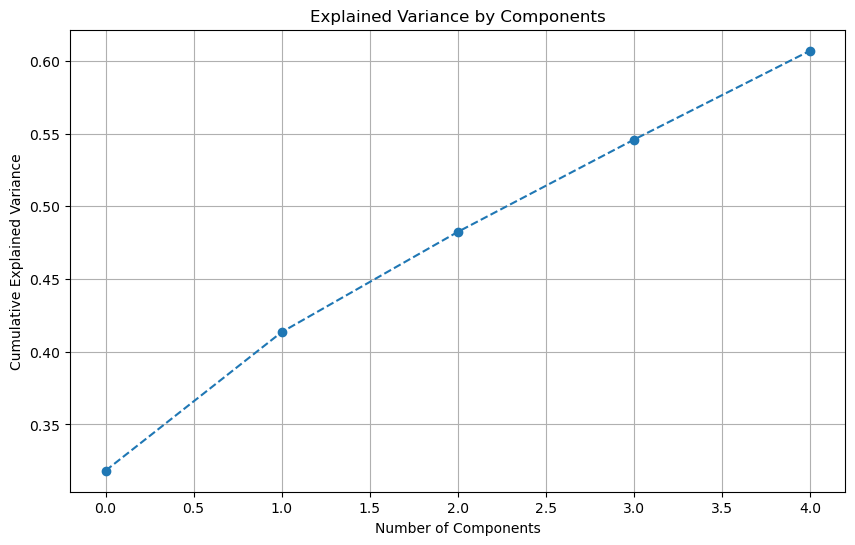

In [10]:
# Plotting the explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [11]:
# Factor Analysis
fa = FactorAnalyzer(n_factors=5, rotation='promax')
fa.fit(sur_int_scaled)

FactorAnalyzer(n_factors=5, rotation_kwargs={})

In [12]:
# Factor loadings
loadings = fa.loadings_
print("Factor loadings:\n", loadings)

Factor loadings:
 [[-6.26497227e-02  5.34488620e-02  1.02690930e-01  5.66766311e-01
  -1.08953460e-01]
 [ 2.14466435e-01 -2.42324008e-01 -1.56117220e-02 -5.96429881e-02
   6.57571563e-01]
 [ 2.39691344e-02  6.46405993e-01  2.73362371e-01 -1.18424854e-01
   1.70156025e-01]
 [ 3.55079925e-02  4.97715531e-01 -1.23070173e-01  1.75301008e-01
   1.43681428e-01]
 [ 1.41555005e-01  4.58574249e-01 -1.52465980e-01 -3.40737284e-02
   1.44277304e-01]
 [ 3.38511455e-02  3.24155779e-01  2.58810660e-02 -1.00512047e-01
   5.58963327e-01]
 [ 3.34491863e-01  2.95377636e-01  3.23026208e-02  6.17495183e-01
   1.06282875e-01]
 [-2.47295397e-01  9.63297208e-01 -8.31312352e-02  3.19566598e-01
  -1.38278273e-01]
 [ 3.57561494e-01  4.13705727e-01  2.86870132e-01 -4.04234530e-01
  -1.26285939e-01]
 [ 3.07274316e-01 -8.66436406e-02 -9.66132255e-02 -3.99986062e-02
  -2.98122154e-01]
 [ 4.08980880e-01  3.85737805e-01 -4.60642257e-02 -1.09581507e-01
   1.03988257e-01]
 [ 5.74897455e-01  7.29136698e-02 -7.79075378e-

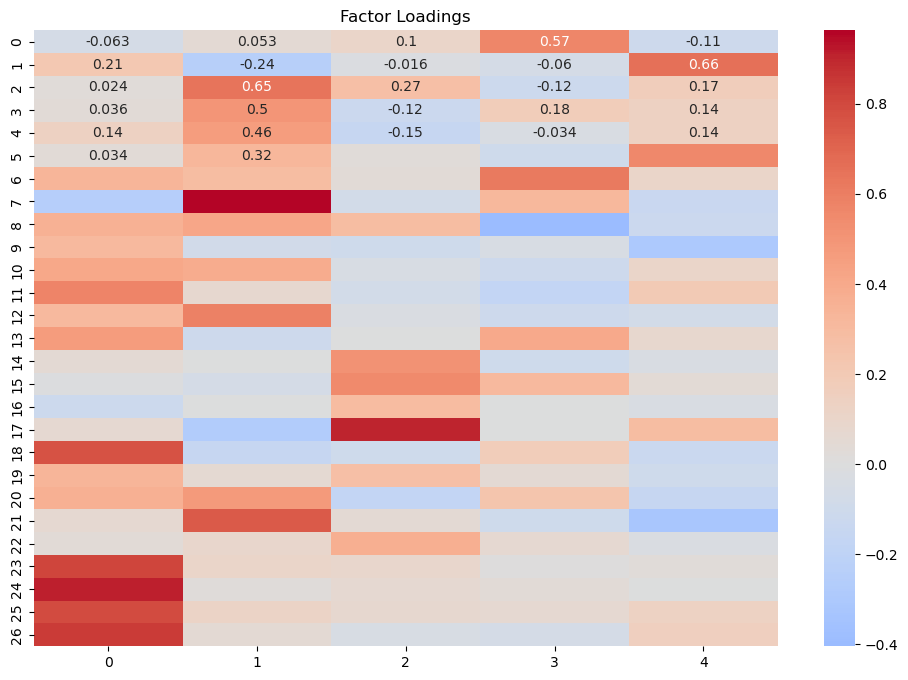

In [13]:
# Plotting the factor loadings
plt.figure(figsize=(12, 8))
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
plt.title('Factor Loadings')
plt.show()

In [14]:
# Eigenvalues
ev, v = fa.get_eigenvalues()
print("Eigenvalues:\n", ev)

Eigenvalues:
 [8.59214681 2.57211281 1.8601171  1.71218596 1.65005587 1.35764516
 1.28618509 1.04216385 0.93653127 0.79863128 0.73574426 0.61407821
 0.55277452 0.53292558 0.50862436 0.40155421 0.33881518 0.29791177
 0.27864365 0.23229769 0.20266837 0.14516714 0.11998814 0.09516032
 0.06000245 0.04985677 0.02601221]


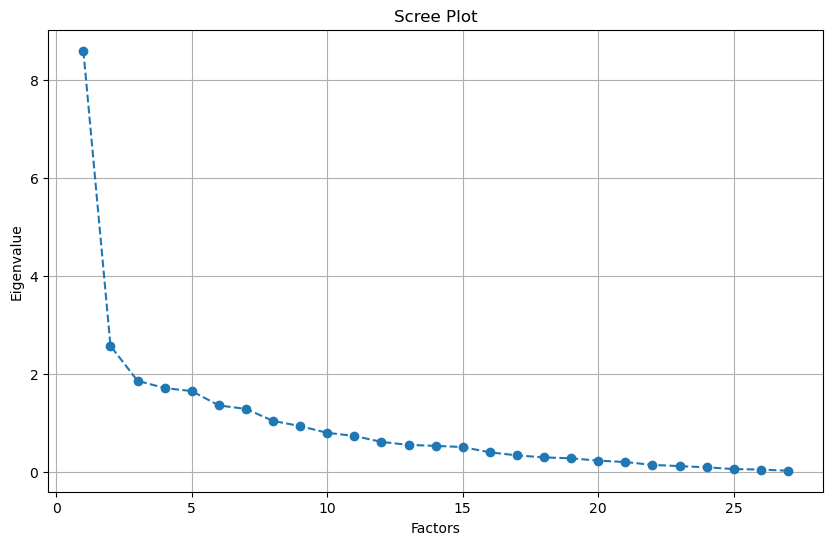

In [15]:
# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(ev) + 1), ev, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()